Fase 6 ‚Äì Visualizaci√≥n de Datos
Usar matplotlib y pandas para mostrar:
1.	Gr√°fico de barras: n√∫mero de pacientes atendidos por servicio.
2.	Gr√°fico circular: distribuci√≥n por sexo.
3.	Histograma: distribuci√≥n de edades.
4.	Reporte tabular: promedio de montos por distrito.


‚úÖ Datos cargados correctamente.
  id_paciente         nombre  edad sexo   distrito       servicio  \
0       P0001     Luis P√©rez     1    M  Magdalena  Traumatolog√≠a   
1       P0002  Carmen Flores     0    F  Cajamarca  Traumatolog√≠a   
2       P0003  Carmen Flores     0    F  Cajamarca        General   
3       P0004  Carmen Flores    19  NaN   Enca√±ada    Odontolog√≠a   
4       P0005    Diego Ramos     0    F   Enca√±ada  Traumatolog√≠a   

  fecha_atencion   monto  
0     2024-07-03    0.00  
1     2023-03-10  474.45  
2     2023-09-19    0.00  
3     2023-04-09    0.00  
4     2023-02-04  759.25  


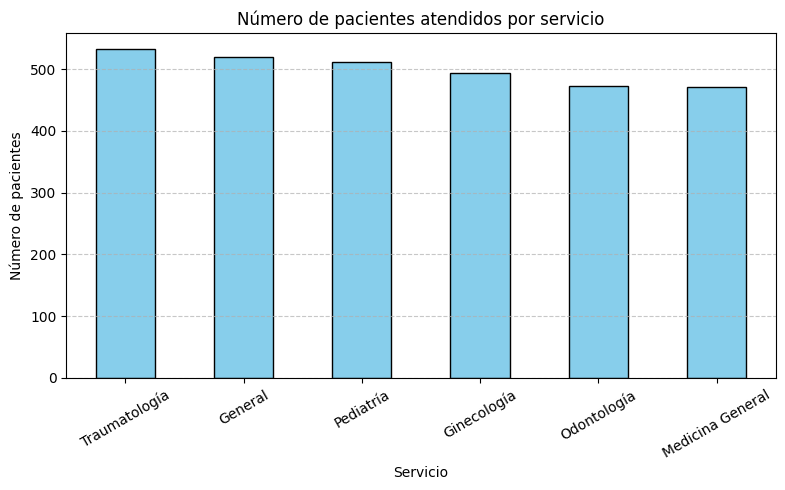

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1Ô∏è‚É£ Cargar datos limpios
data_path = Path.cwd() / "../database/pacientes_clean.csv"
df = pd.read_csv(data_path)
print("‚úÖ Datos cargados correctamente.")
print(df.head())

# 2Ô∏è‚É£ Asegurar tipos de datos
df["edad"] = pd.to_numeric(df["edad"], errors="coerce").fillna(0).astype(int)
df["monto"] = pd.to_numeric(df["monto"], errors="coerce").fillna(0.0).astype(float)

# 1. Gr√°fico de barras: pacientes por servicio

plt.figure(figsize=(8,5))
servicio_counts = df["servicio"].value_counts()
servicio_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("N√∫mero de pacientes atendidos por servicio")
plt.xlabel("Servicio")
plt.ylabel("N√∫mero de pacientes")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

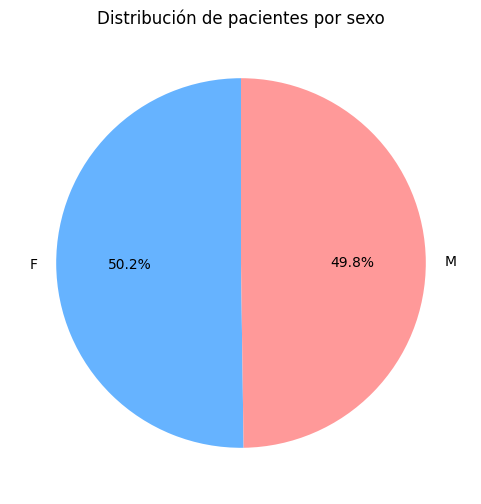

In [3]:

#  2. Gr√°fico circular: distribuci√≥n por sexo

plt.figure(figsize=(6,6))
sexo_counts = df["sexo"].value_counts()
plt.pie(sexo_counts, labels=sexo_counts.index, autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#ff9999","#99ff99"])
plt.title("Distribuci√≥n de pacientes por sexo")
plt.show()

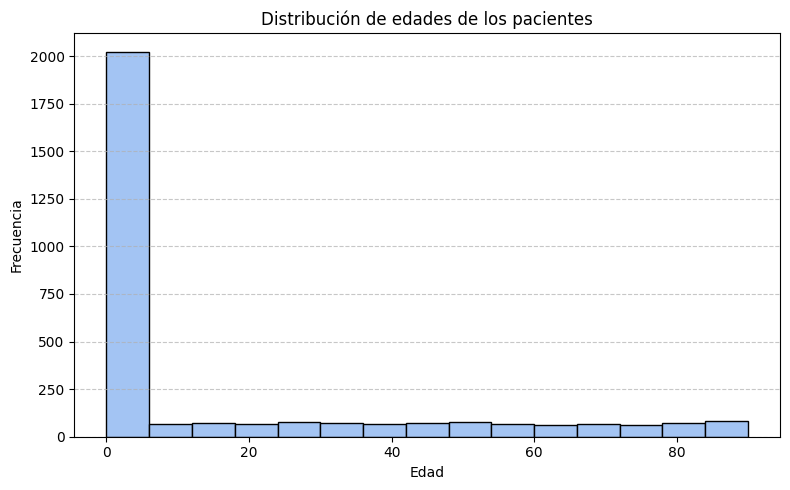

In [4]:

# 3. Histograma: distribuci√≥n de edades

plt.figure(figsize=(8,5))
df["edad"].plot(kind="hist", bins=15, color="#a3c4f3", edgecolor="black")
plt.title("Distribuci√≥n de edades de los pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:

# 4. Reporte tabular: promedio de montos por distrito

reporte = df.groupby("distrito")["monto"].mean().round(2).reset_index().sort_values(by="monto", ascending=False)
print("\nüìä Promedio de montos por distrito:")
print(reporte)


üìä Promedio de montos por distrito:
         distrito   monto
6       Los Ba√±os  148.34
7       Magdalena  148.02
3     Desconocido  141.79
5           Jes√∫s  137.72
1       Cajamarca  131.37
2        Chetilla  131.31
8          Matara  130.48
0  Ba√±os del Inca  125.44
4        Enca√±ada  120.10


In [6]:

# Conclusiones autom√°ticas (b√°sicas)

print("\n Conclusiones:")
top_servicio = servicio_counts.idxmax()
top_distrito = reporte.iloc[0]["distrito"]
print(f"‚Ä¢ El servicio con m√°s atenciones es: {top_servicio}.")
print(f"‚Ä¢ El distrito con el monto promedio m√°s alto es: {top_distrito}.")
print("‚Ä¢ La mayor√≠a de los pacientes son del sexo m√°s frecuente mostrado en el gr√°fico circular.")



 Conclusiones:
‚Ä¢ El servicio con m√°s atenciones es: Traumatolog√≠a.
‚Ä¢ El distrito con el monto promedio m√°s alto es: Los Ba√±os.
‚Ä¢ La mayor√≠a de los pacientes son del sexo m√°s frecuente mostrado en el gr√°fico circular.
